In [143]:
# Importing Required Libraries
import numpy as np 
import pandas as pd 
import string 
import spacy 
import time

#Importing Data Visualization Libraries
from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

In [144]:
def get_Soup(url):
    while True:
        req = Request(url, headers={'User-Agent': 'Chrome'})
        try:
            webpage = urlopen(req).read()
            soup =  BeautifulSoup(webpage, 'html.parser')
            return soup
        except:
            pass

In [145]:
def get_review(name,id,pid,lid):
    
    # reviews's data 
    data ={'Review':[]}
    
    # to read multiple page 
    pg=1
    while True:
        
        # make url with name and id
        url = "https://www.flipkart.com/noise-colorfit-pro-3-smartwatch/product-reviews/itm2e817033f1466?pid=SMWFY8QMY3YQJT7T&lid=LSTSMWFY8QMY3YQJT7T8IR1RK&marketplace=FLIPKART".format(name,id,pid,lid,pg)
        #increment of page
        pg+=1
        # retrive soup object
        soup = get_Soup(url)
        
        # retrive next button of page
        next = soup.find('a',class_='_1LKTO3')
        #collect all reviews post
        reviews = soup.find_all('div',class_='_27M-vq')
        # iterate individual review
        for rev in reviews:
            data['Review'].append(rev.find('div', class_="t-ZTKy").div.text.strip())
        # check next page is disable or not
        if next:
            pass
        else:
            flipkart = pd.DataFrame(data)
            flipkart.to_csv('{}.csv'.format(name))
            print('{}.csv file successfully save !'.format(id))
            return 
        time.sleep(10)

In [146]:
flipkart

,Unnamed: 0,Review


In [147]:
import json
import ssl
from urllib.request import Request, urlopen
from bs4 import BeautifulSoup

ctx=ssl.create_default_context()
ctx.check_hostname=False
ctx.verify_mode = ssl.CERT_NONE

In [148]:
name="noise-colorfit-pro-3-smartwatch"
id="itm2e817033f1466"
pid="SMWFY8QMY3YQJT7T"
lid="LSTSMWFY8QMY3YQJT7T8IR1RK"

get_review(name,id,pid,lid)

itm2e817033f1466.csv file successfully save !


In [150]:
flipkart = pd.read_csv('/content/noise-colorfit-pro-3-smartwatch.csv', encoding='latin1')
flipkart

,Unnamed: 0,Review
0,0,Awesome - 3rd Gen from the noise is as expecte...
1,1,Eye catching watch. Really beautiful specially...
2,2,Color fit pro3 is best and best watch!!It's a ...
3,3,One of the best budget Smartwatch . It has all...
4,4,"Smart watch with premium look , nice features ..."
...,...,...
145,145,I am using this product on my iphone ... it is...
146,146,Pros-- accurate values- Feels premium except f...
147,147,This price range the best smart watch....Pro's...
148,148,"I am very happy with the product, firstly i pu..."


# EDA

In [151]:
flipkart = [Review.strip() for Review in flipkart.Review] # remove both the leading and the trailing characters
flipkart = [Review for Review in flipkart if Review] # removes empty strings, because they are considered in Python as False
flipkart[0:10]

['Awesome - 3rd Gen from the noise is as expected it give you an awesome experience. Great work guysREAD MORE',
 "Eye catching watch. Really beautiful specially this rose gold colour is so fascinating. Must got for this watch. For the price it's great. Just a little lage may be coz I'm an iPhone user . Else it's fabulousREAD MORE",
 "Color fit pro3 is best and best watch!!It's a gift for me..i love it.The watch is good in everything like display, its tracking activity overall fit perfect in wrist just go for it!READ MORE",
 'One of the best budget Smartwatch . It has all the necessary features in this price range . Heart rate and the other monitoring feature showâ\x80\x99s the accurate results . Very happy with the product â\x9d¤ï¸\x8fTips : In the beginning charge it full to get better results.READ MORE',
 'Smart watch with premium look , nice features , gud quality and also in affordable price..i love it â\x9d¤ï¸\x8fREAD MORE',
 'I am using this product on my iphone ... it is so cool

In [152]:
##Part Of Speech Tagging
nlp = spacy.load('en')

one_block = flipkart[2]
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style='ent', jupyter=True)

/usr/lib/python3.7/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


In [153]:
one_block

"Color fit pro3 is best and best watch!!It's a gift for me..i love it.The watch is good in everything like display, its tracking activity overall fit perfect in wrist just go for it!READ MORE"

In [154]:
for token in doc_block[0:20]:
    print(token, token.pos_)

Color NOUN
fit ADJ
pro3 NOUN
is AUX
best ADJ
and CCONJ
best ADJ
watch!!It PROPN
's AUX
a DET
gift NOUN
for ADP
me PRON
.. PUNCT
i PRON
love VERB
it PRON
. PUNCT
The DET
watch NOUN


In [155]:
#Filtering for nouns and verbs only
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN', 'VERB')]
print(nouns_verbs[5:25])

['display', 'tracking', 'activity', 'fit', 'wrist', 'go']


In [156]:
#Counting tokens again
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
wf_df = pd.DataFrame(words_freq)
wf_df.columns = ['word', 'count']

wf_df[0:10]

,word,count
0,color,1
1,pro3,1
2,gift,1
3,love,1
4,watch,1
5,display,1
6,tracking,1
7,activity,1
8,fit,1
9,wrist,1


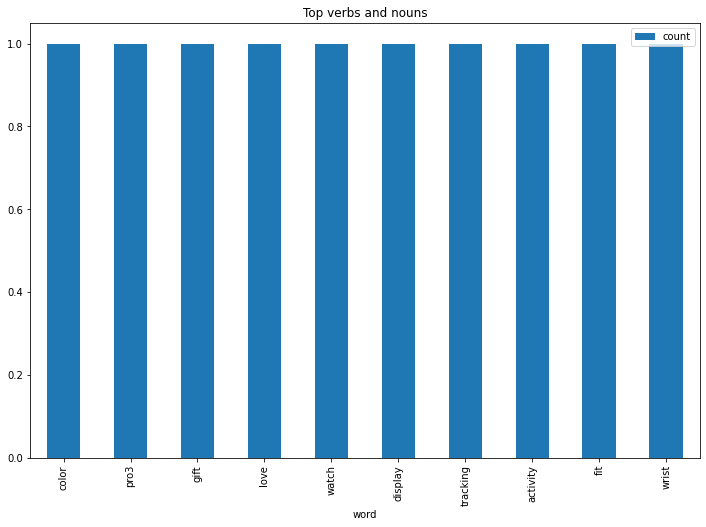

In [157]:
##Visualizing results
#Barchart for top 10 nouns + verbs
wf_df[0:10].plot.bar(x='word', figsize=(12,8), title='Top verbs and nouns')

In [159]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

import pandas
book=pd.read_csv("/content/noise-colorfit-pro-3-smartwatch.csv",error_bad_lines=False)
book = [Review.strip() for Review in book.Review] # remove both the leading and the trailing characters
book = [Review for Review in book if Review] # removes empty strings, because they are considered in Python as False

In [160]:
!pip install nltk
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [161]:
from nltk import tokenize
sentences = tokenize.sent_tokenize(" ".join(book))
sentences[5:15]

["Just a little lage may be coz I'm an iPhone user .",
 "Else it's fabulousREAD MORE Color fit pro3 is best and best watch!",
 "!It's a gift for me..i love it.The watch is good in everything like display, its tracking activity overall fit perfect in wrist just go for it!READ MORE One of the best budget Smartwatch .",
 'It has all the necessary features in this price range .',
 'Heart rate and the other monitoring feature show’s the accurate results .',
 'Very happy with the product ❤️Tips : In the beginning charge it full to get better results.READ MORE Smart watch with premium look , nice features , gud quality and also in affordable price..i love it ❤️READ MORE I am using this product on my iphone ... it is so cool.',
 'I have also used today in gym it shows good activity tracking also has best display really loved it.',
 'And the notifications systems are so great .',
 'Totally the product is best in this price and display really loved full star ⭐️ .',
 "Thank uh NoiseFitREAD MORE P

In [162]:
sent_df = pd.DataFrame(sentences, columns=['sentence'])
sent_df

,sentence
0,Awesome - 3rd Gen from the noise is as expecte...
1,Great work guysREAD MORE Eye catching watch.
2,Really beautiful specially this rose gold colo...
3,Must got for this watch.
4,For the price it's great.
...,...
326,Buy this watch only if you want to go after th...
327,It’s good only to view the time.
328,The step count function doesn’t work properly ...
329,"Also, cannot reject calls from the watch."


In [163]:
#Sentiment analysis
afinn = pd.read_csv('Afinn.csv', sep=',', encoding='latin-1')
afinn.shape

(2477, 2)

In [164]:
affinity_scores = afinn.set_index('word')['value'].to_dict()

In [165]:
#Custom function :score each word in a sentence in lemmatised form, 
#but calculate the score for the whole original sentence.
nlp = spacy.load('en')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [166]:
# test that it works
calculate_sentiment(text = 'best')

3

In [167]:
# how many words are in the sentence?
sent_df['word_count'] = sent_df['sentence'].str.split().apply(len)
sent_df['word_count'].head(10)

0    16
1     7
2    10
3     5
4     5
5    12
6    12
7    34
8    11
9    12
Name: word_count, dtype: int64

In [168]:
sent_df

,sentence,word_count
0,Awesome - 3rd Gen from the noise is as expecte...,16
1,Great work guysREAD MORE Eye catching watch.,7
2,Really beautiful specially this rose gold colo...,10
3,Must got for this watch.,5
4,For the price it's great.,5
...,...,...
326,Buy this watch only if you want to go after th...,12
327,It’s good only to view the time.,7
328,The step count function doesn’t work properly ...,16
329,"Also, cannot reject calls from the watch.",7


In [169]:
sent_df['sentiment_value'] = sent_df['sentence'].apply(calculate_sentiment)

In [170]:
# how many words are in the sentence?
sent_df['word_count'] = sent_df['sentence'].str.split().apply(len)
sent_df['word_count'].head(10)

0    16
1     7
2    10
3     5
4     5
5    12
6    12
7    34
8    11
9    12
Name: word_count, dtype: int64

In [171]:
sent_df

,sentence,word_count,sentiment_value
0,Awesome - 3rd Gen from the noise is as expecte...,16,8
1,Great work guysREAD MORE Eye catching watch.,7,3
2,Really beautiful specially this rose gold colo...,10,6
3,Must got for this watch.,5,0
4,For the price it's great.,5,3
...,...,...,...
326,Buy this watch only if you want to go after th...,12,1
327,It’s good only to view the time.,7,3
328,The step count function doesn’t work properly ...,16,-2
329,"Also, cannot reject calls from the watch.",7,-1


In [172]:
sent_df.sort_values(by='sentiment_value').tail(10)

,sentence,word_count,sentiment_value
256,Thank uh NoiseFitREAD MORE Pros-- accurate val...,135,41
234,Thank uh NoiseFitREAD MORE Pros-- accurate val...,135,41
146,Thank uh NoiseFitREAD MORE Pros-- accurate val...,135,41
278,Thank uh NoiseFitREAD MORE Pros-- accurate val...,135,41
36,Thank uh NoiseFitREAD MORE Pros-- accurate val...,135,41
124,Thank uh NoiseFitREAD MORE Pros-- accurate val...,135,41
190,Thank uh NoiseFitREAD MORE Pros-- accurate val...,135,41
58,Thank uh NoiseFitREAD MORE Pros-- accurate val...,135,41
322,Thank uh NoiseFitREAD MORE Pros-- accurate val...,135,41
80,Thank uh NoiseFitREAD MORE Pros-- accurate val...,135,41


In [173]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    331.000000
mean       5.981873
std        8.807003
min       -2.000000
25%        0.000000
50%        3.000000
75%        7.000000
max       41.000000
Name: sentiment_value, dtype: float64

In [174]:
sent_df[sent_df['sentiment_value']>=20].head()

,sentence,word_count,sentiment_value
14,Thank uh NoiseFitREAD MORE Pros-- accurate val...,135,41
36,Thank uh NoiseFitREAD MORE Pros-- accurate val...,135,41
58,Thank uh NoiseFitREAD MORE Pros-- accurate val...,135,41
80,Thank uh NoiseFitREAD MORE Pros-- accurate val...,135,41
102,Thank uh NoiseFitREAD MORE Pros-- accurate val...,135,41


In [175]:
sent_df['index']=range(0,len(sent_df))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


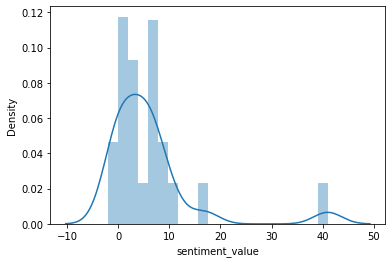

In [176]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(sent_df['sentiment_value'])

In [177]:
sent_df.sentiment_value.value_counts()

 0     61
 6     60
 3     60
-1     15
 41    15
 17    15
 11    15
-2     15
 9     15
 8     15
 7     15
 5     15
 1     15
Name: sentiment_value, dtype: int64

Visualization

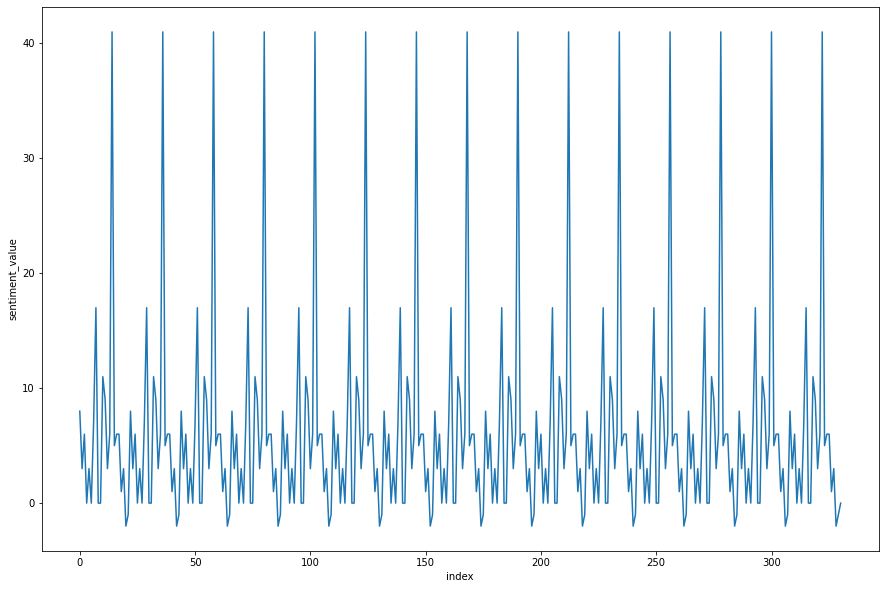

In [178]:
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

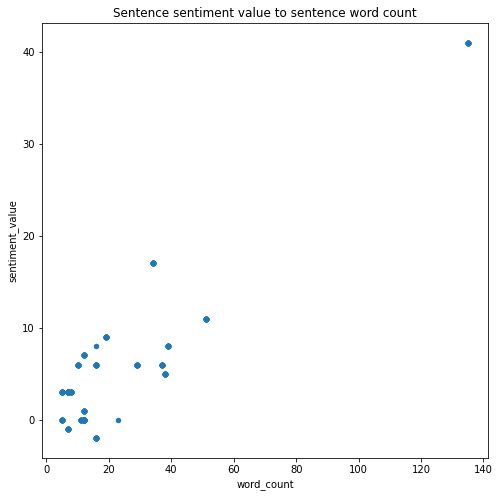

In [179]:
sent_df.plot.scatter(x='word_count', y='sentiment_value', figsize=(8,8), title='Sentence sentiment value to sentence word count')